# Import libraries

In [ ]:
!pip install contractions
!pip install eli5

     |████████████████████████████████| 266kB 5.8MB/s 
     |████████████████████████████████| 327kB 7.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85261 sha256=1f8e55435e0b8020d65d574b2bd215a9d06bd589e4d484d33c4ceaff47fc5bdd
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick
     |████████████████████████████████| 112kB 5.8MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.random import seed
seed(1234)

from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
import re
import string 
from nltk.corpus import wordnet

from bs4 import BeautifulSoup
import unicodedata
from collections import Counter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import contractions
import eli5


nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#SKLEARN

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV



from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV



from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, f1_score, recall_score,roc_auc_score
from sklearn.metrics import confusion_matrix


from tabulate import tabulate





In [ ]:
#KERAS

import tensorflow as tf
tf.random.set_seed(1234)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.python.keras import models, layers, optimizers


In [ ]:
tf.random.set_seed(1234)


# Functions 

In [ ]:
#PREPROCESSING

PUNCT_TO_REMOVE = string.punctuation

def expand_contractions(text):
  
  return " ".join([contractions.fix(w) for w in text.split()])
   
  
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text


def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def remove_numbers(text):
    return ''.join(c for c in text if not c.isdigit())


def remove_repetition(text):

  pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
  text = pattern.sub(r"\1", text)
  return text


def getWordnetPOS(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

wnl=WordNetLemmatizer()

def lemmatize_words(text):
  words=[w for w in text.split() if w!="" and w!="-"]
  words=[wnl.lemmatize(w[0],pos=getWordnetPOS(w[1])) for w in pos_tag(words)]
  return " ".join(words)



stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = " ".join(word for word in text.split(" ") if word not in stopword)
    return text

In [ ]:
#SKLEARN 

def draw_matrix_confusion(yTest, yPred, subplot, name, measures):
    LABELS = ['Positive', 'Negative'] 
    conf_matrix = confusion_matrix(yTest, yPred) 
    sns.set(font_scale=2)
    ax = plt.subplot(3, 2, subplot)

    sns.heatmap(conf_matrix, xticklabels = LABELS,  
                yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title(name, fontsize=20, fontweight='bold') 
    plt.ylabel('Real Review', fontsize=20, fontweight='bold') 
    plt.xlabel('Predicted Review\nROC-AUC: {}'.format(measures[-1]), fontsize=20, fontweight='bold') 
    return conf_matrix



def calculate_measures(y_test, yPred):
    acc = accuracy_score(y_test, yPred)
    prec = precision_score(y_test, yPred, average='micro')
    rec = recall_score(y_test, yPred, average='micro')
    f1 = f1_score(y_test, yPred, average='weighted', labels=np.unique(yPred))
    roc_auc = roc_auc_score(y_test, yPred)
    
    return acc, prec, rec, f1, roc_auc



def make_machine_learning(classifier):
    
    
    classifier.fit(features_train, Y_train)
    yPred = classifier.predict(features_test)

    measures = calculate_measures(Y_test, yPred)

    return measures, yPred


def train():
    fig = plt.figure(figsize =(26, 20))
    fig.suptitle('Matrices de confusion', fontsize=30, fontweight='bold')
    performance_measures = []   
    i = 1
    for name, classifier in algs:
        tup = []
        print('Entrainement du modèle avec la technique :  ' + name)
        measures, yPred = make_machine_learning(classifier)
        tup.append(name)
        for mea in measures:
            tup.append(mea)
        performance_measures.append(tup)
        print('Affichage de la matrice de confusion pour ' + name)
        confusion_matrix = draw_matrix_confusion(Y_test, yPred, i, name, measures)
        i += 1
    print('\n')
    fig.tight_layout(pad=3.0)
    plt.show()
    print('')
    print(tabulate(performance_measures, headers=['Method', 'Accuracy', 'Precision', 'Recall', 'f1 Score', 'ROC AUC']))


In [ ]:
#OTHERS


def plot_confusion_matrix(y_test,y_pred):
  cf_matrix=confusion_matrix(y_test,y_pred)

  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')



# Import data

In [ ]:
#on lie le notebook au drive pour importer le dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#import du dataset
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine learning/Projet_IMDB/imdb_master.csv', encoding='latin-1')

In [ ]:
#on ne garde que les reviews qui sont labelisées en positive ou négative

df = df[df.label != 'unsup']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   type        50000 non-null  object
 2   review      50000 non-null  object
 3   label       50000 non-null  object
 4   file        50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


# Cleaning reviews

In [ ]:
corpus=df['review'].to_frame()
corpus['review']=corpus['review'].str.lower() #on met tous les caractères en minuscule

**On développe les contractions**

*exemples*

Don't--> Do not

I'm --> I am 

In [ ]:
corpus['review']=corpus['review'].apply(lambda x: expand_contractions(x))

**On retire les tags html**








In [ ]:
#par exemple les "<br>"

In [ ]:
corpus['review']=corpus['review'].apply(lambda x: strip_html_tags(x))

**On retire les ponctuations**

*exemples*

hello! how are you? --> hello how are you

In [ ]:
corpus['review'] = corpus['review'].apply(lambda x: remove_punct(x))

**On retire les caratères accentués**

In [ ]:
corpus['review'] = corpus['review'].apply(lambda x: remove_accented_chars(x))

**On retire les numéros**

In [ ]:
corpus['review'] = corpus['review'].apply(lambda x: remove_numbers(x))

**On retire les répétitions**

*exemples*

heyy-> hey

moviie--> movie

In [ ]:
corpus['review'] = corpus['review'].apply(lambda x: remove_repetition(x))

**On procède à une lemmatisation des mots**

*exemples*

movies --> movie

better --> good

In [ ]:
corpus['review'] = corpus['review'].apply(lambda x: lemmatize_words(x))

**On retire les "stopwords"**

Edit: On préferera utiliser l'argument "max_df" (lors de la Tokenisation avec scikit-learn) dont on fixe la valeur dans l'intervalle [0.25, 1.0) pour détecter et filtrer automatiquement les "stop words" en fonction de la fréquence des termes dans les reviews intra-corpus.

In [ ]:
#corpus['review'] = corpus['review'].apply(lambda x: remove_stopwords(x))

Finalement, on crée notre dataset final qui servira pour la suite

In [ ]:
final_df=pd.concat([df['label'],corpus['review'],df['type']],axis=1)
final_df['label'] = final_df['label'].map({'neg' : 0, 'pos' : 1})
final_df.head(5) #on affiche les 5 premières lignes 

,label,review,type
0,0,once again mr costner have drag out a movie fo...,test
1,0,this be an example of why the majority of acti...,test
2,0,first of all i hate those moronic rapper who c...,test
3,0,not even the beatles could write song everyone...,test
4,0,brass picture movie be not a fitting word for ...,test


# EDA

count    50000.000000
mean       228.647480
std        169.259108
min          4.000000
25%        125.000000
50%        172.000000
75%        277.000000
max       2454.000000
Name: review, dtype: float64


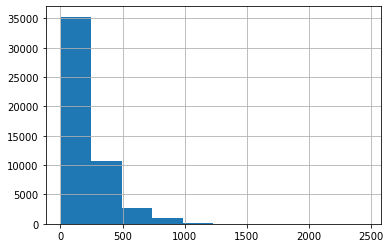

In [ ]:
#analyse longueur des reviews

lens = final_df.review.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [ ]:
positive_sent=final_df[final_df['label']==1]
negative_sent=final_df[final_df['label']==0]

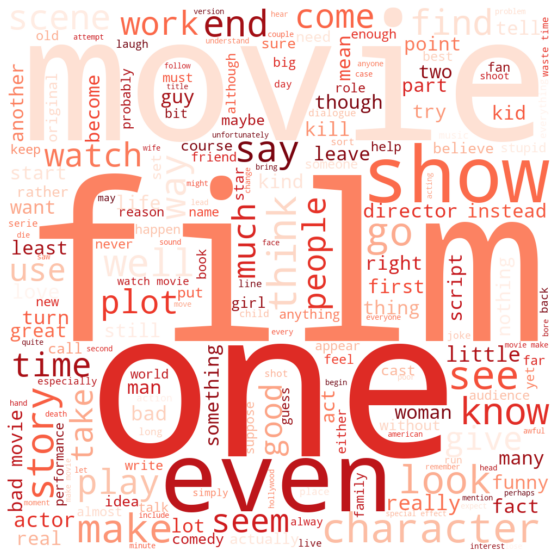

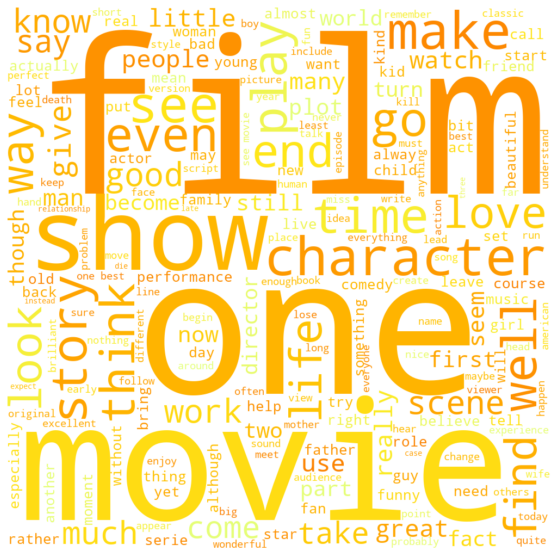

In [ ]:
#wordcloud pour reviews positives et pour reviews négatives


all_text = ' '.join(word for word in negative_sent.review)
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

all_text = ' '.join(word for word in positive_sent.review)
wordcloud_p2 = WordCloud(width=1000, height=1000, colormap='Wistia',background_color='white', mode='RGBA').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_p2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Modeling

In [ ]:
#création des training et test set

X_train=final_df[final_df['type']=='train']['review']
X_test=final_df[final_df['type']=='test']['review']

Y_train=final_df[final_df['type']=='train']['label']
Y_test=final_df[final_df['type']=='test']['label']

print(len(X_train), 'train samples')
print(len(X_test), 'test samples')

25000 train samples
25000 test samples


##Deep Learning | Keras

**Tokenization**

In [ ]:
tokenizer = Tokenizer(num_words=10000) #on sélectionne 10000 mots 

tokenizer.fit_on_texts(X_train)

x_train=tokenizer.texts_to_sequences(X_train)
x_test=tokenizer.texts_to_sequences(X_test)

#on fait en sorte que toutes les séquences aient la même taille (on fixe 300 ici)

print('Pad sequences (samples x sequence lenght)')

x_train=pad_sequences(x_train, maxlen=300)
x_test=pad_sequences(x_test, maxlen=300)


print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x sequence lenght)
x_train shape: (25000, 300)
x_test shape: (25000, 300)


### Model 1 | Bidirectional LSTM

Un LSTM (**Long Short-Term Memory**) bidirectionnel est un modèle de traitement des séquences qui se compose de deux LSTM : l'un prend l'entrée dans une direction avant (de gauche à droite), et l'autre dans une direction arrière ( de droite à gauche)

Les BiLSTM augmentent effectivement la quantité d'informations disponibles pour le réseau, améliorant le contexte dont dispose l'algorithme (par exemple, savoir quels mots suivent et précèdent immédiatement un mot dans une phrase).



---



On a une couche d'*Embedding* qui transforme des entiers positifs (index) en vecteurs denses de taille fixe.

Par exemple : [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]



---


La couche "*Dropout*" met aléatoirement des unités d'entrée à 0 avec une fréquence de 0.10, à chaque étape du training, ce qui permet d'éviter l'overfitting.



---

La couche *GlobalMaxPool1D* permet de réduire la complexité du modèle et les calculs en réduisant les dimensions.

In [ ]:
tf.random.set_seed(1234)

model = Sequential()
model.add(Embedding(10000, 128 , input_length = 300)) 

model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.10))


        
model.add(Dense(1, activation="sigmoid"))

optim= RMSprop(learning_rate=(0.01))
  

  
model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
model.summary()

result = model.fit(x_train, Y_train,
              batch_size=64,
              epochs=2,
              verbose=0)
            

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 128)          1280000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300, 128)          98816     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


**Evaluation**

In [ ]:
scores = model.evaluate(x_test, Y_test, verbose=0)
scores_train=result.history['accuracy'][1]

print("Accuracy on test set: %.2f%%" % (scores[1]*100))
print("Accuracy on training set: %.2f%%" % (scores_train*100))

Accuracy on test set: 89.72%
Accuracy on training set: 91.59%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning:

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.



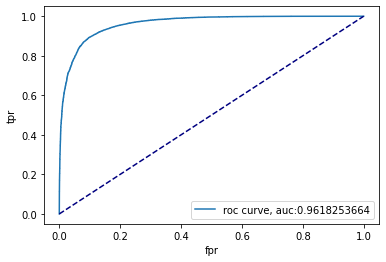

In [ ]:
#on affiche la courbe ROC ainsi que le score AUC

fpr, tpr, threshold = roc_curve(Y_test,model.predict_proba(x_test))
auc(fpr,tpr)
plt.plot(fpr,tpr,label="roc curve, auc:"+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.legend(loc=4)
plt.show()

In [ ]:
#Affichons le rapport de classification

y_pred=model.predict_classes(x_test)
print(classification_report(Y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

           0       0.89      0.90      0.90     12500
           1       0.90      0.89      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



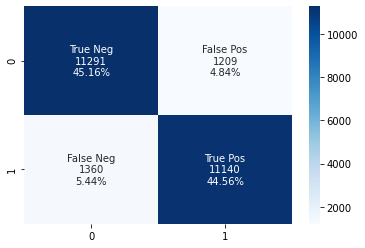

In [ ]:
plot_confusion_matrix(Y_test,y_pred)

### Model 2 | CNN

**CNN** **(Convolutional Neural Network)**

In [ ]:
tf.random.set_seed(1234)

model = Sequential()
model.add(Embedding(10000, 128, input_length=300)) #couche d'embedding

model.add(Conv1D(128, 4,activation='relu')) 
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) #output layer


optim=RMSprop(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
model.summary()
# Fit the model
result=model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=2, batch_size=64, verbose=0)




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 297, 128)          65664     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 99, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12672)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12672)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 12673     
Total params: 1,358,337
Trainable params: 1,358,337
Non-trainable params: 0
____________________________________________

In [ ]:
scores = model.evaluate(x_test, Y_test, verbose=0)
scores_train=result.history['accuracy'][1]

print("Accuracy on test set: %.2f%%" % (scores[1]*100))
print("Accuracy on training set: %.2f%%" % (scores_train*100))

Accuracy on test set: 88.43%
Accuracy on training set: 90.43%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning:

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.



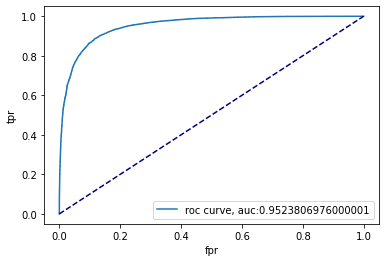

In [ ]:
fpr, tpr, threshold = roc_curve(Y_test,model.predict_proba(x_test))
auc(fpr,tpr)
plt.plot(fpr,tpr,label="roc curve, auc:"+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred=model.predict_classes(x_test)
print(classification_report(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



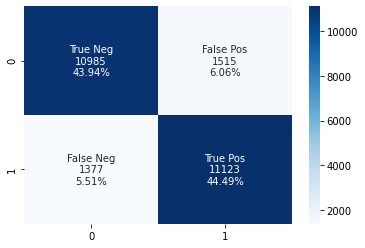

In [ ]:
plot_confusion_matrix(Y_test,y_pred)

## Scikit-learn

### Classifiers overview

In [ ]:
algs = [
            ['Random Forest', RandomForestClassifier()],
            ['KNN', KNeighborsClassifier()],
            ['Support Machine Vector',LinearSVC()],
            ['Logistic Regression', LogisticRegression()]]

In [ ]:
vectorizer=TfidfVectorizer()
features_train=vectorizer.fit_transform(X_train)
features_test=vectorizer.transform(X_test)

Entrainement du modèle avec la technique :  Random Forest
Affichage de la matrice de confusion pour Random Forest
Entrainement du modèle avec la technique :  KNN
Affichage de la matrice de confusion pour KNN
Entrainement du modèle avec la technique :  Support Machine Vector
Affichage de la matrice de confusion pour Support Machine Vector
Entrainement du modèle avec la technique :  Logistic Regression
Affichage de la matrice de confusion pour Logistic Regression




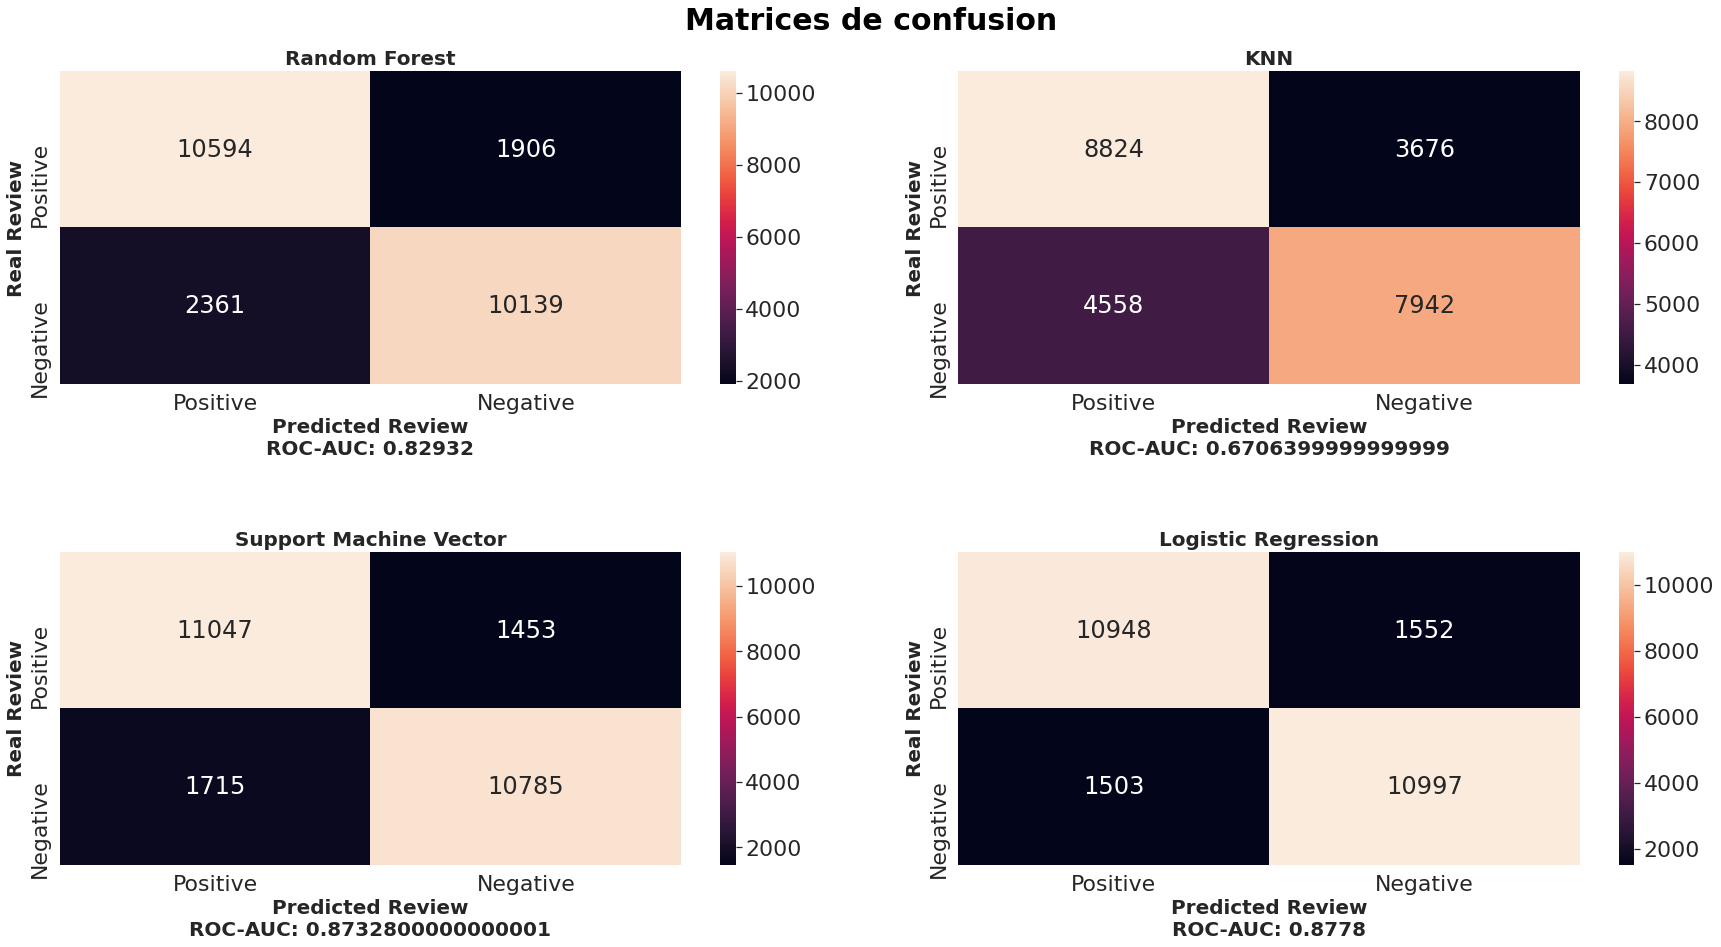


Method                    Accuracy    Precision    Recall    f1 Score    ROC AUC
----------------------  ----------  -----------  --------  ----------  ---------
Random Forest              0.82932      0.82932   0.82932    0.829263    0.82932
KNN                        0.67064      0.67064   0.67064    0.67023     0.67064
Support Machine Vector     0.87328      0.87328   0.87328    0.873266    0.87328
Logistic Regression        0.8778       0.8778    0.8778     0.8778      0.8778


In [ ]:
train()

### Logistic Regression

**Vectorization**

In [ ]:
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=False)),
    ('lr', LogisticRegression(max_iter=800))
])

grid_params = {
  
  'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
  'tfidf__max_features': [10000,20000],
  'tfidf__ngram_range' :[ (1,2), (1,3)]
}
clf = GridSearchCV(lr_pipeline, grid_params, scoring='accuracy', cv=5, verbose=True)
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 29.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        

In [ ]:
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.87544
Best Params:  {'tfidf__max_df': 0.25, 'tfidf__max_features': 20000, 'tfidf__ngram_range': (1, 3)}


In [ ]:
#on transforme les reviews en vecteur --> feature extraction
#en se basant sur la matrice TF-IDF 

#on ne garde que les mots qui sont présents dans moins du quart des reviews, on en garde 20000 et on garde des 1gram, des 2gram et des 3grams.
#exemple: "movie" : 1-gram , "good movie" : 2-gram, very good movie: 3-gram

vectorizer=TfidfVectorizer(max_df=0.25,max_features=20000,ngram_range=(1,3))
features_train=vectorizer.fit_transform(X_train)
features_test=vectorizer.transform(X_test)

print("Dimensions des tableaux de données de test et d'apprentissage:", features_train.shape)

Dimensions des tableaux de données de test et d'apprentissage: (25000, 20000)


**GridSearchCV on Logistic Regression**

In [ ]:
#on va tuner les paramètres de la régression logistique 
#on fait varier les paramètres solver et C dans un premier temps

model=LogisticRegression(max_iter=800)

grid_params = {
    
  'solver': ['lbfgs', 'saga','sag', 'newton-cg'],
  'C' : np.linspace(1,10,10)
  
   }
clf_bis = GridSearchCV(model, grid_params, scoring='accuracy', cv=5, verbose=True)
clf_bis.fit(features_train, Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=800, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'solver': ['lbfgs', 'saga', 'sag', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=True)

In [ ]:
print("Best Score: ", clf_bis.best_score_)
print("Best Params: ", clf_bis.best_params_)

Best Score:  0.8749600000000001
Best Params:  {'C': 2.0, 'solver': 'sag'}


In [ ]:
model_lr=LogisticRegression(C=2.0, solver='sag')

In [ ]:
#on applique le "meilleur modèle" à nos données 

model_lr.fit(features_train,Y_train)
y_pred=model_lr.predict(features_test)

**Evaluation**

In [ ]:
print("        Logistic regression:\n====================================================")
print("\n- L'accuracy sur l'ensemble test est de:", accuracy_score(Y_test,y_pred))
y_train_pred=model_lr.predict(features_train)
print("\n- L'accuracy sur l'ensemble train est de:", accuracy_score(Y_train,y_train_pred))

        Logistic regression:

- L'accuracy sur l'ensemble test est de: 0.8972

- L'accuracy sur l'ensemble train est de: 0.95376


In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     12500
           1       0.89      0.90      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



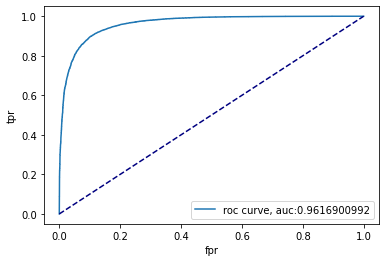

In [ ]:
fpr, tpr, threshold = roc_curve(Y_test,model_lr.predict_proba(features_test)[:,1])
auc(fpr,tpr)
plt.plot(fpr,tpr,label="roc curve, auc:"+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.legend(loc=4)
plt.show()


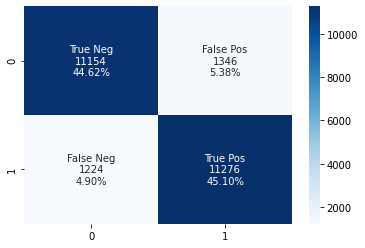

In [ ]:
plot_confusion_matrix(Y_test,y_pred)

**Interpretation**

Regardons quels mots ou groupe de mots ont influencé dans le choix du classifier pour attribuer une revue à la classe "positive" 

In [ ]:
eli5.show_weights(estimator=model_lr, 
                  feature_names= list(vectorizer.get_feature_names()),
                    top=(20,20))

Weight?,Feature
+6.606,excellent
+5.416,perfect
+5.144,be great
+5.029,wonderful
+4.367,fun
+4.244,today
+4.232,love
+4.130,enjoy
+3.935,the best
+3.907,favorite


### Voting Classifier

Nous allons regarder s'il est possible d'améliorer la performance de la régression logistique, en la combinant avec deux autres modèles:

- Un SVC à noyau linéaire

- Un classificateur multinomial Naive Bayes 

Pour celà on utilise un classifier à vote.


In [ ]:

model_svc = CalibratedClassifierCV(LinearSVC()) #pour permettre le predict_proba (pour utiliser le voting='soft')

models = [('lr',model_lr),('multi_nb',MultinomialNB()), ('svc', model_svc)]
ensemble = VotingClassifier(estimators=models, voting='soft', weights=[1,1,1])

Montrons un exemple d'agrégation des modèles, avec somme des probabilités d'affectation (car voting='soft')

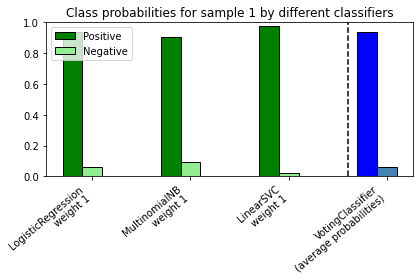

In [ ]:
# predict class probabilities for all classifiers
probas = [c.fit(features_train, Y_train).predict_proba(features_test) for c in (model_lr,MultinomialNB(), model_svc,ensemble)]

# get class probabilities for the first sample in the dataset

class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N =4  # number of groups
ind = np.arange(N)  # group positions
width = 0.20  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'MultinomialNB\nweight 1',
                    
                    'LinearSVC\nweight 1',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['Positive', 'Negative'], loc='upper left')
plt.tight_layout()
plt.show()

Entraînons le voteur sur nos données

In [ ]:
ensemble.fit(features_train, Y_train)

y_pred = ensemble.predict(features_test)

print("        Voting Classifier:\n====================================================")
print("\n- L'accuracy sur l'ensemble test est de:", accuracy_score(Y_test,y_pred))
y_train_pred=ensemble.predict(features_train)
print("\n- L'accuracy sur l'ensemble train est de:", accuracy_score(Y_train,y_train_pred))

        Voting Classifier:

- L'accuracy sur l'ensemble test est de: 0.8976

- L'accuracy sur l'ensemble train est de: 0.96004


In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     12500
           1       0.89      0.91      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



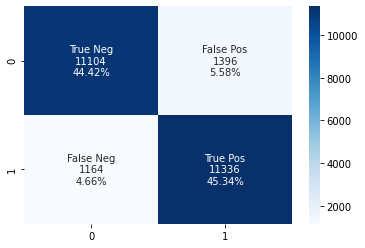

In [ ]:
plot_confusion_matrix(Y_test,y_pred)

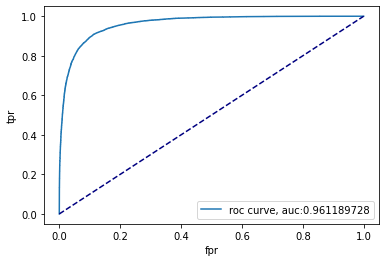

In [ ]:
fpr, tpr, threshold = roc_curve(Y_test,ensemble.predict_proba(features_test)[:,1])
auc(fpr,tpr)
plt.plot(fpr,tpr,label="roc curve, auc:"+str(auc(fpr,tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.legend(loc=4)
plt.show()

On remarque à l'aide de la matrice de confusion que le voteur a permis d'un peu mieux détecter les revues positives que la régression logistique, mais un peu moins les revues négatives.
Au global, l'accuracy est un tout petit peu mieux. 
Nous ne sommes pas sûres que la pertinence du voteur soit significative ici.
Celà dépend si on préfère détecter les positives ou les négatives en priorité.